In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras import models, layers, datasets

In [ ]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data() # 60,000 grayscale images(28x28 pixel) of the 10 digits,
                                                                        #along with a test set of 10,000 images.
print(len(x_train))
print(len(x_test))
print(x_train[0].shape) # basic info about our dataset.

60000
10000
(28, 28)


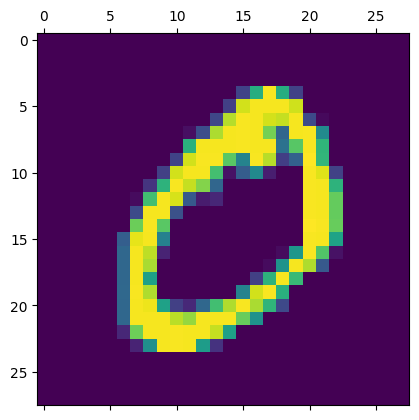

The above digit is  0


In [ ]:
plt.matshow(x_train[1])  #one instance is a image consisting of 28*28 pixel matrix
plt.show()
print("The above digit is ",y_train[1])

In [ ]:
x_train = x_train / 255
x_test = x_test / 255   # Normalising the data


In [ ]:
Cnn = models.Sequential([
        #Convolution layers for feature extraction
      layers.Conv2D(filters = 32, kernel_size =(3,3), strides=(1,1), activation = 'relu', input_shape = (28,28,1)),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(filters = 64,kernel_size = (3,3),strides= (1,1), activation = 'relu'),
      layers.MaxPooling2D((2,2)),

        #fully connected dense neural networks for classification
      layers.Flatten(), # # when we are in the middle layer we dont need to specify the shape for Flatten() as we did in above case,In this case the network can figure it out automatically.
      layers.Dense(50, activation='relu'),
      layers.Dense(10,activation='softmax') #output layer
    ])

Cnn.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
history = Cnn.fit(x_train,y_train,epochs = 4)

Epoch 1/4
1875/1875 [==============================] - 47s 24ms/step - loss: 0.1568 - accuracy: 0.9528
Epoch 2/4
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0492 - accuracy: 0.9844
Epoch 3/4
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0335 - accuracy: 0.9898
Epoch 4/4
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0258 - accuracy: 0.9919


In [ ]:
history

Text(0.5, 1.0, 'Training Loss')

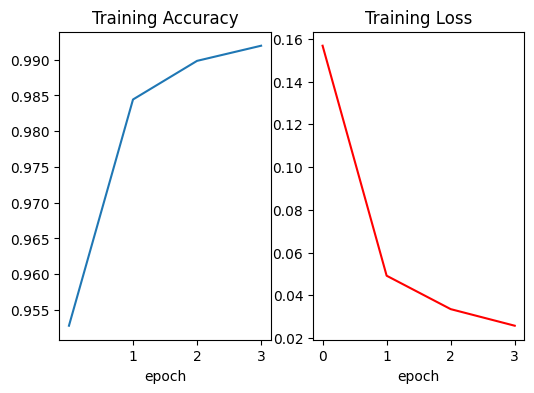

In [ ]:
plt.figure(figsize=(6,4))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.title('Training Accuracy')

plt.subplot(122)
plt.plot(history.history['loss'],color='r')
plt.xlabel('epoch')
plt.title('Training Loss')

In [ ]:
Cnn.evaluate(x_test,y_test)

313/313 [==============================] - 5s 13ms/step - loss: 0.0303 - accuracy: 0.9900


[0.030325494706630707, 0.9900000095367432]

In [ ]:
y_pred = Cnn.predict(x_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

313/313 [==============================] - 2s 8ms/step


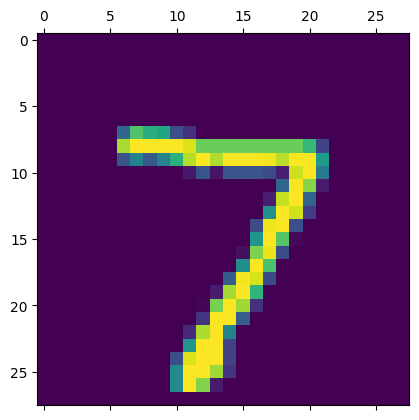

In [ ]:
plt.matshow(x_test[0])

In [ ]:
y_pred[0]

array([8.6496982e-10, 3.4633818e-09, 8.5745739e-08, 2.9760887e-08,
       9.6232577e-11, 1.5519751e-09, 1.8649435e-13, 9.9999970e-01,
       2.4189063e-08, 1.1408112e-07], dtype=float32)

In [ ]:
y_pred_labels[0]

7

Text(95.72222222222221, 0.5, 'Truth')

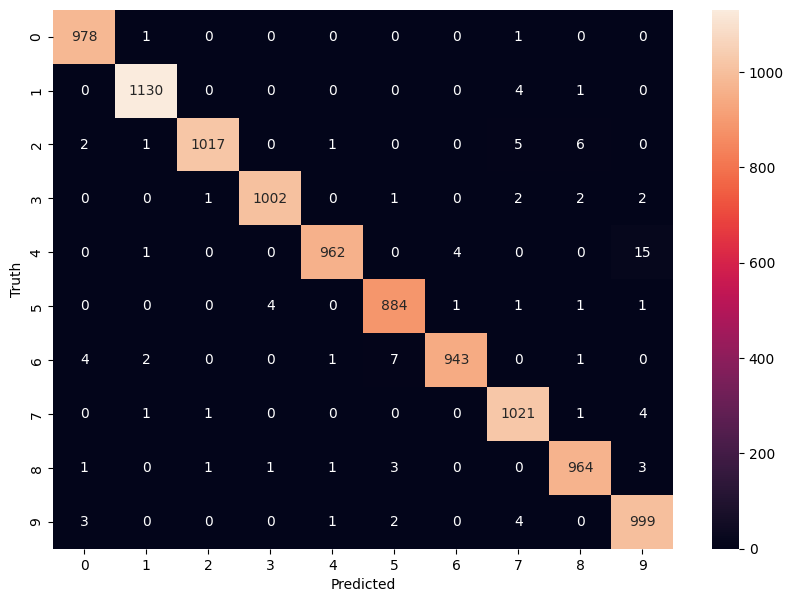

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')